In [10]:
import numpy as np
import cmath
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
# hamiltonian matrix - each term above has one matrix like the one bellow associated with it

spatial_H_ground = np.array([[0.1, -0.4],
                             [-0.4, 0.1]]) # will give valence band - inside cell, no pbc's

spatial_plusone = np.array([[0, 0],
                            [0.7, 0]]) # will give conduction band - between N and N+1 cells, will use pbc's 
                            
spatial_minusone = np.array([[0, 0.7],
                             [0, 0]]) # will give conduction band - between N-1 and N cells, will use pbc's 

In [12]:
# converting from real space to reciprocal space - Bloch theorem

def reciprocal_matrix(k):

    H11 = spatial_H_ground[0][0] * cmath.exp(1j * 0 * k) + spatial_plusone[0][0] * cmath.exp(1j * -1 * k) + spatial_minusone[0][0] * cmath.exp(1j * 1 * k)
    H12 = spatial_H_ground[0][1] * cmath.exp(1j * 0 * k) + spatial_plusone[0][1] * cmath.exp(1j * -1 * k) + spatial_minusone[0][1] * cmath.exp(1j * 1 * k)
    H21 = spatial_H_ground[1][0] * cmath.exp(1j * 0 * k) + spatial_plusone[1][0] * cmath.exp(1j * -1 * k) + spatial_minusone[1][0] * cmath.exp(1j * 1 * k)
    H22 = spatial_H_ground[1][1] * cmath.exp(1j * 0 * k) + spatial_plusone[1][1] * cmath.exp(1j * -1 * k) + spatial_minusone[1][1] * cmath.exp(1j * 1 * k)

    reciprocal = np.array([ [ H11 , H12 ] , 
                            [ H21 , H22 ] ])

    return reciprocal

In [27]:
# calculate the dispersion

def dispersion(lower_limit, upper_limit):

    space = np.linspace(lower_limit, upper_limit, 1000)

    plus_eigenvalues = []
    minus_eigenvalues = []

    for i in space:
        M = reciprocal_matrix(i)
        eigenvalues, eigenvectors = np.linalg.eigh(M)

        plus_eigenvalues.append(eigenvalues[1])
        minus_eigenvalues.append(eigenvalues[0])


    return minus_eigenvalues, plus_eigenvalues

In [28]:
# Plotting

sn.set(style="whitegrid")

def plot_dispersion(conduction_band, valence_band):

    space = np.linspace(-np.pi, np.pi, 1000)

    plt.figure(figsize=(10, 6))

    plt.plot(space, valence_band, label='Valence Band', color='blue')
    plt.plot(space, conduction_band, label='Conduction Band', color='red')
    
    plt.xlabel('k-space')
    plt.ylabel('Energy')
    plt.title('Dispersion Relation: Valence and Conduction Bands')
    plt.legend()
    
    plt.show()


In [29]:
test, test2 = dispersion(-np.pi, np.pi)

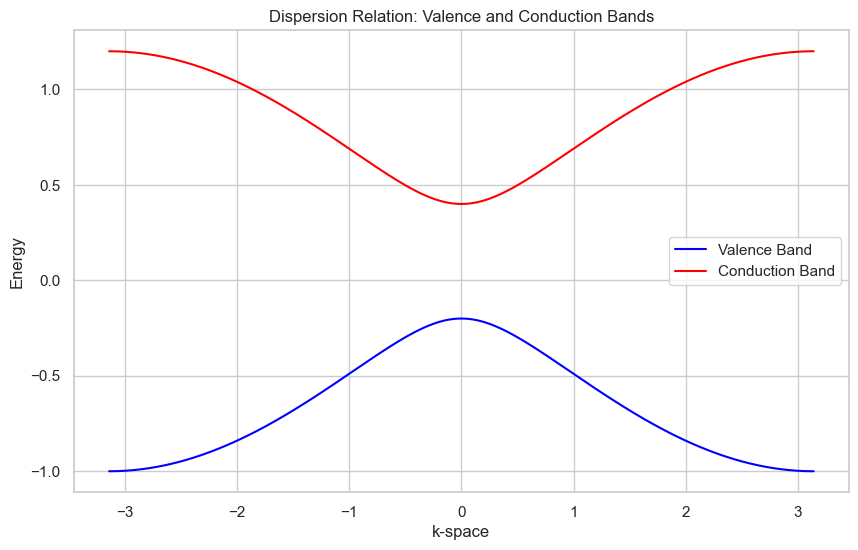

In [30]:
plot_dispersion(test2, test)

## Generalisation for 2D